# Setting up the stage

In [1]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.4 MB/s eta 0:00:00


In [67]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import sys
import time
import seaborn as sns
import os
import math
import pickle as pkl
import shap

#%%
# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    precision_recall_curve,
    r2_score,
    roc_auc_score,
    classification_report,
    roc_curve,
    auc
)
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:


file_path = '/content/drive/My Drive/DeepLab/creditcard_2023_head.csv'
data = pd.read_csv(file_path)


In [5]:
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [6]:
# Loading first setup
with open('../content/drive/My Drive/DeepLab/setup_1.pkl', 'rb') as f:
    setup1 = pkl.load(f)

X_train, _, X_test, y_test = setup1['X_train'], setup1['y_train'], setup1['X_test'], setup1['y_test']

In [7]:
# second setup
with open('../content/drive/My Drive/DeepLab/setup_2.pkl', 'rb') as f:
    setup1 = pkl.load(f)

X_train, _, X_test, y_test = setup1['X_train'], setup1['y_train'], setup1['X_test'], setup1['y_test']

In [8]:
# Convert X_train to DataFrame
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_train.shape[1]-1)] + ['Amount']
X_train_df = pd.DataFrame(X_train[:, 1:], columns=columns)  # Excluding 'id'

In [9]:
X_train_df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.808528,0.674859,-0.449053,-1.009887,-0.313425,-0.329320,-0.032745,0.596103,0.689862,1.072580,...,-0.051966,0.068797,1.023462,0.377241,-0.611014,-0.430071,-0.385856,0.211656,0.686939,5627.33
1,0.074483,-0.412612,1.567228,-1.086749,-0.002263,-0.020128,0.395198,-0.184193,-0.136276,0.834880,...,0.023013,-0.005700,0.531355,0.016798,0.860576,-0.986578,-0.710048,-0.184877,0.322587,15063.76
2,0.756835,-0.449989,0.898726,0.290844,0.369626,1.465313,0.286892,0.003828,0.492053,0.755715,...,-0.501453,-0.093142,0.212591,0.030729,-1.594817,0.276861,0.412457,-0.159757,-0.075716,19639.65
3,1.171350,-1.101996,-0.226173,-1.968957,0.360373,0.620495,0.532979,-0.149801,1.760402,0.162676,...,0.187468,0.112663,1.158432,-0.370593,-2.443644,0.176785,-1.318719,-0.229471,-0.175032,1983.72
4,-0.076201,0.056564,0.014876,-0.250377,0.840080,0.452710,0.905192,-0.071975,-0.033624,0.376080,...,-0.181484,-0.068607,0.319503,-0.168810,0.221816,0.095515,-0.973325,0.032127,0.323907,13082.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268672,-0.040619,0.110463,-0.139994,0.144836,-0.121047,-0.365008,-0.127769,0.023312,-0.331857,-0.373908,...,0.099910,0.100337,0.011561,-0.073086,0.213259,0.295273,0.045889,0.330697,0.528295,6931.81
268673,0.073982,-0.265425,-0.118630,-0.258457,-0.363985,-0.088220,-0.319523,0.010129,0.211143,-0.035713,...,0.366188,0.157938,0.853472,0.236245,0.053078,-1.886891,-1.057982,0.347773,0.031333,13143.56
268674,-0.200103,0.045871,-0.408556,-0.093210,0.016061,-0.752639,-0.057346,-0.091536,0.196605,-0.401903,...,-0.301515,0.114767,0.173152,-0.560406,-0.042897,0.248425,-1.635785,-0.336882,0.244104,10762.70
268675,-1.445469,0.694114,-1.142635,1.143542,-1.137783,0.364773,-1.503699,-0.549902,-1.427193,-1.342366,...,0.399627,-0.897863,1.287436,0.754007,-0.864374,-0.335728,0.029300,0.045837,0.093925,944.08


In [10]:
# Convert X_test to DataFrame
# Assuming the first column is 'id' and the last column is 'amount'
columns = ['Feature_' + str(i) for i in range(1, X_test.shape[1]-1)] + ['Amount']
X_test_df = pd.DataFrame(X_test[:, 1:], columns=columns)  # Excluding 'id'

# Min-Max Scaling



In [12]:
#from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the training data
#X_train_df_scaled = pd.DataFrame(scaler.fit_transform(X_train_df), columns=X_train_df.columns)

# Transform the test data (using the same scaler from the training data)
#X_test_df_scaled = pd.DataFrame(scaler.transform(X_test_df), columns=X_test_df.columns)


In [13]:
X_train_df_scaled

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,0.469385,0.932337,0.157988,0.483436,0.183015,0.439552,0.019366,0.612377,0.184813,0.121371,...,0.722972,0.605233,0.500486,0.494696,0.202949,0.466901,0.566135,0.086562,0.341575,0.232482
1,0.623633,0.912316,0.274471,0.474008,0.188923,0.446091,0.021291,0.555934,0.150418,0.114557,...,0.723666,0.601566,0.472365,0.488883,0.289342,0.447191,0.542728,0.083357,0.338442,0.625834
2,0.742829,0.911628,0.235851,0.642981,0.195984,0.477510,0.020804,0.569535,0.176577,0.112287,...,0.718811,0.597260,0.454149,0.489108,0.145192,0.491940,0.623774,0.083560,0.335017,0.816577
3,0.815238,0.899624,0.170864,0.365798,0.195808,0.459641,0.021912,0.558422,0.229383,0.095287,...,0.725188,0.607393,0.508199,0.482635,0.095360,0.488395,0.498781,0.082997,0.334163,0.080601
4,0.597311,0.920954,0.184790,0.576596,0.204916,0.456092,0.023587,0.564051,0.154692,0.101404,...,0.721773,0.598468,0.460259,0.485889,0.251842,0.485517,0.523719,0.085111,0.338453,0.543251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268672,0.603526,0.921946,0.175843,0.625072,0.186668,0.438797,0.018938,0.570944,0.142275,0.079905,...,0.724378,0.606786,0.442661,0.487433,0.251340,0.492592,0.597307,0.087524,0.340211,0.286859
268673,0.623545,0.915026,0.177077,0.575605,0.182055,0.444651,0.018075,0.569990,0.164882,0.089600,...,0.726843,0.609622,0.490772,0.492422,0.241936,0.415304,0.517607,0.087662,0.335938,0.545792
268674,0.575667,0.920757,0.160328,0.595873,0.189271,0.430598,0.019255,0.562636,0.164277,0.079102,...,0.720661,0.607497,0.451895,0.479574,0.236302,0.490932,0.475889,0.082129,0.337767,0.446547
268675,0.358122,0.932692,0.117919,0.747571,0.167364,0.454232,0.012746,0.529480,0.096673,0.052143,...,0.727152,0.557641,0.515570,0.500773,0.188075,0.470243,0.596110,0.085222,0.336476,0.037264


# Normalize between zero and 1

# Robust Scaler


In [40]:
from sklearn.preprocessing import RobustScaler


# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the training data
X_train_df_scaled = pd.DataFrame(scaler.fit_transform(X_train_df), columns=X_train_df.columns)

# Transform the test data using the same scaler from the training data
X_test_df_scaled = pd.DataFrame(scaler.transform(X_test_df), columns=X_test_df.columns)



In [15]:
def count_frauds_non_frauds(labels):
    num_frauds = np.sum(labels == 1)
    num_non_frauds = np.sum(labels == 0)
    return num_frauds, num_non_frauds

# Call the function to count frauds and non-frauds
num_frauds, num_non_frauds = count_frauds_non_frauds(y_test)

print("Number of frauds:", num_frauds)
print("Number of non-frauds:", num_non_frauds)


Number of frauds: 15638
Number of non-frauds: 28432


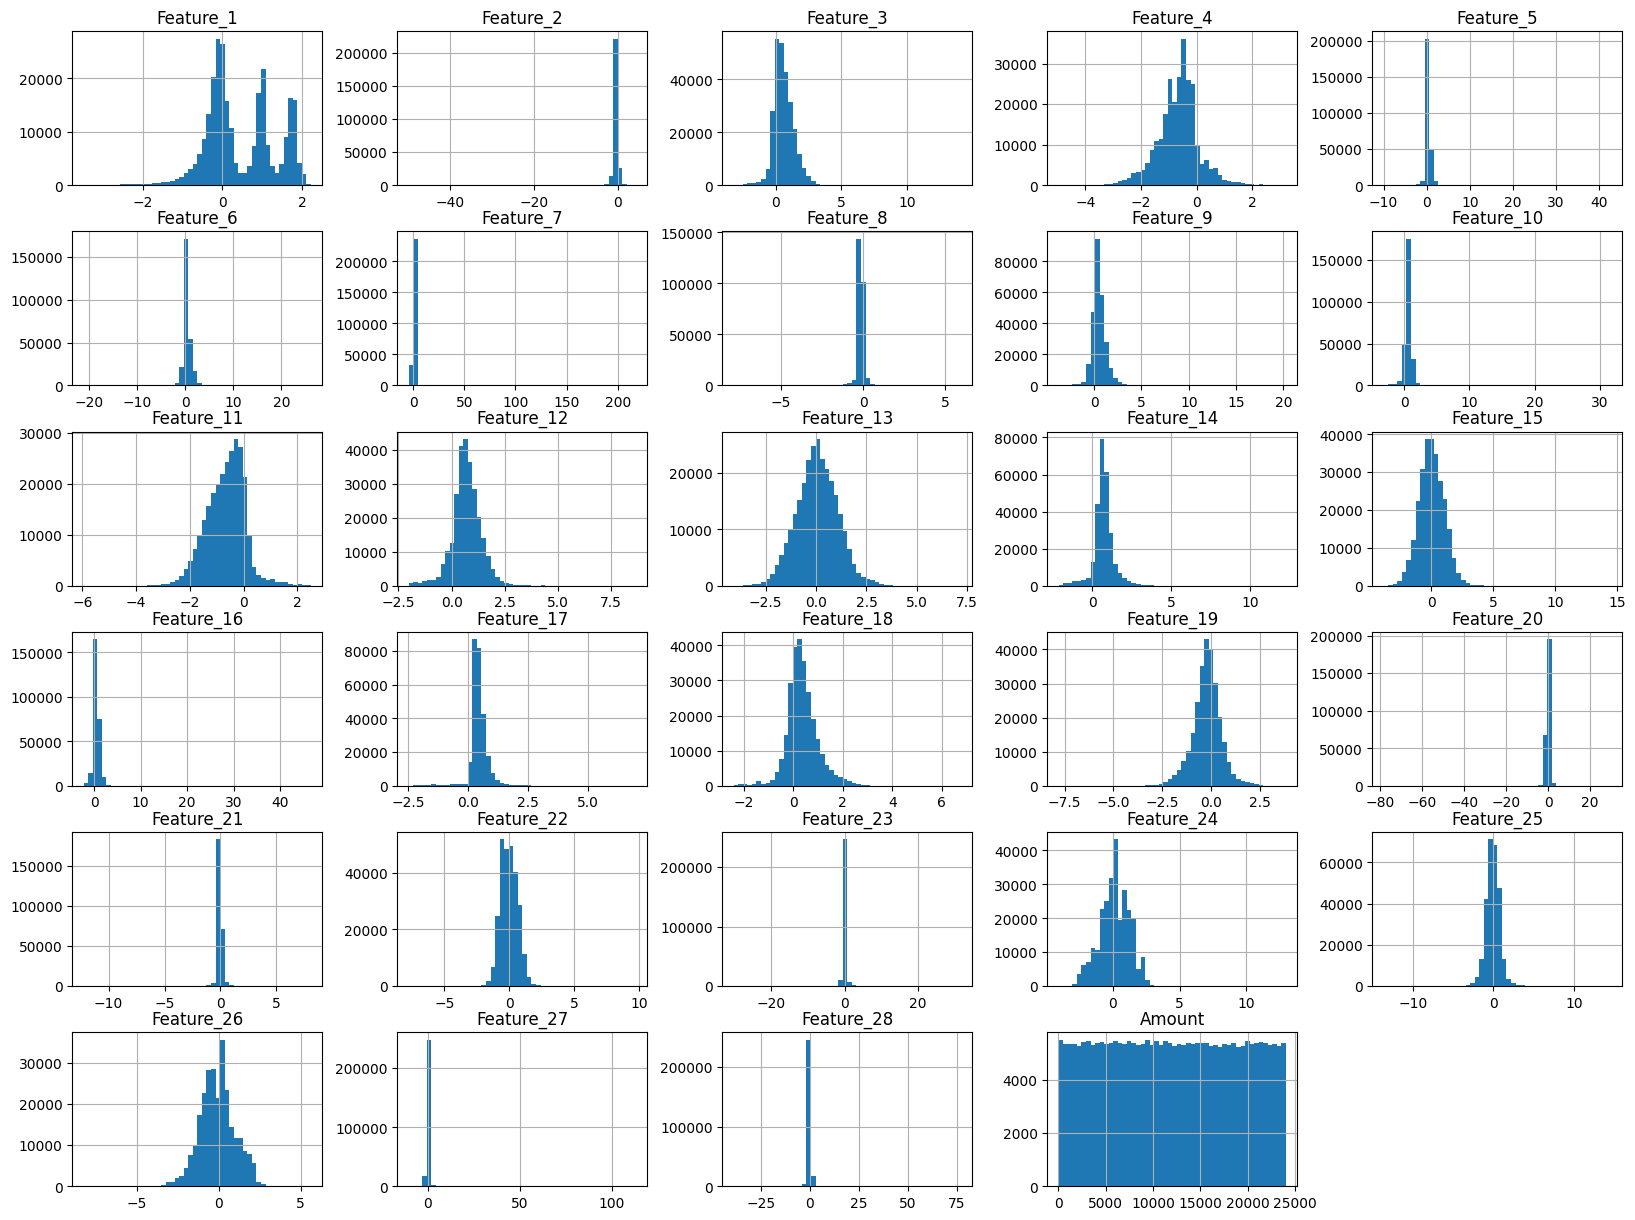

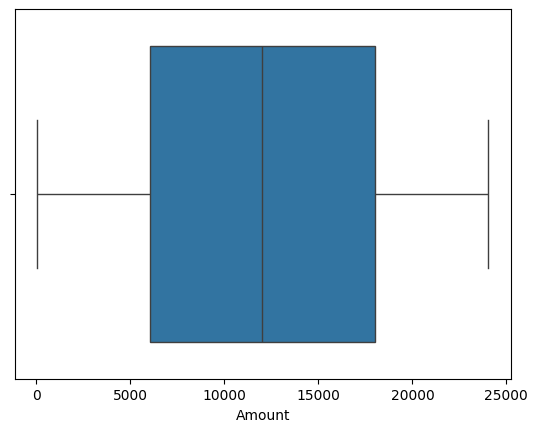

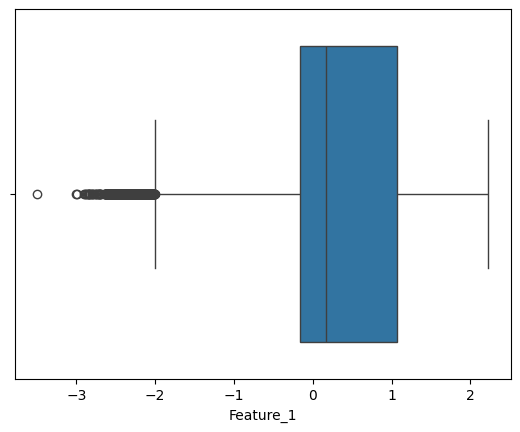

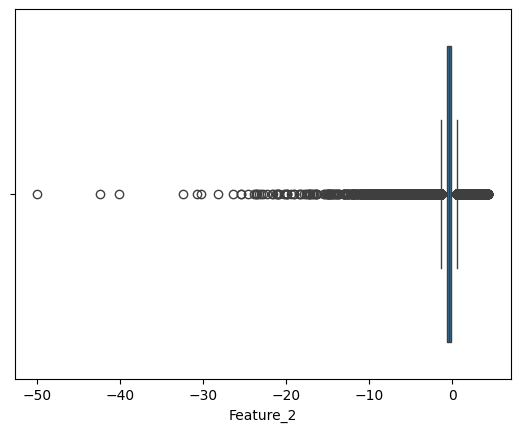

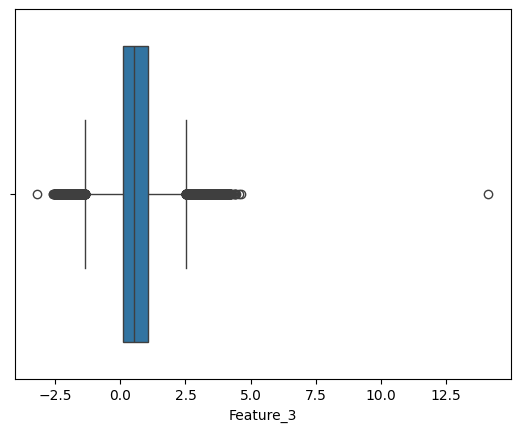

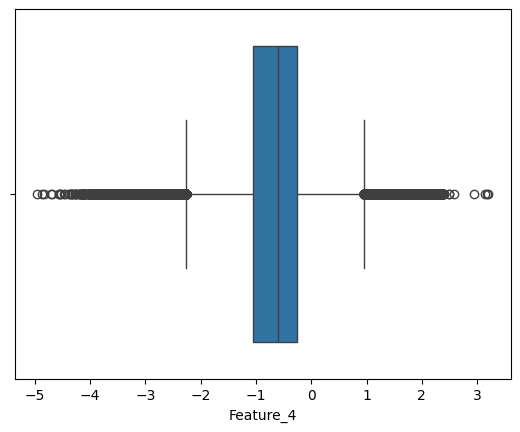

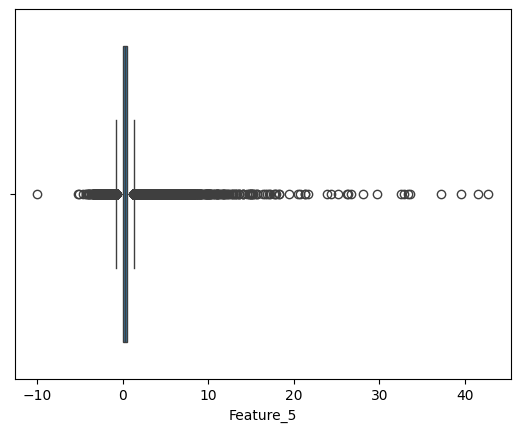

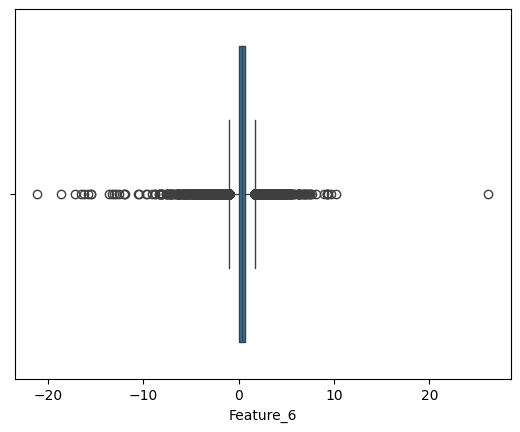

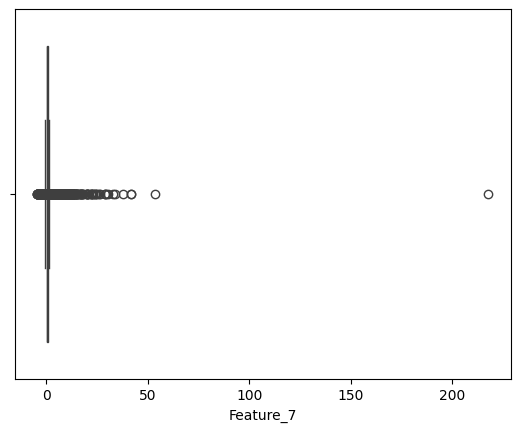

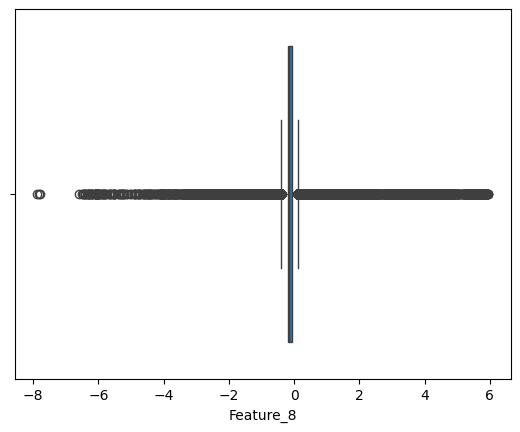

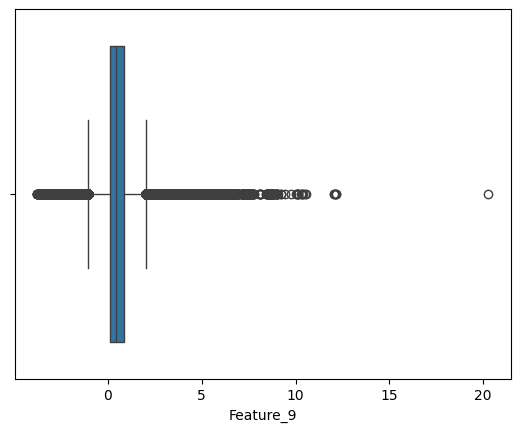

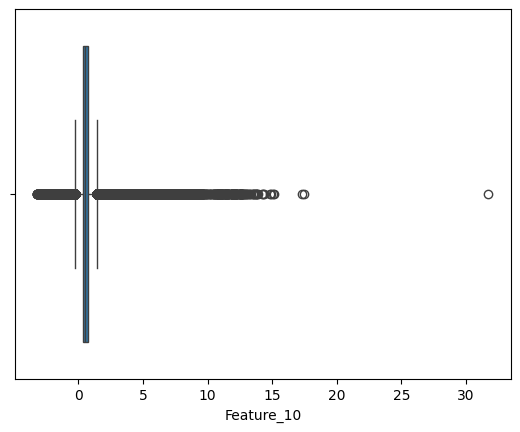

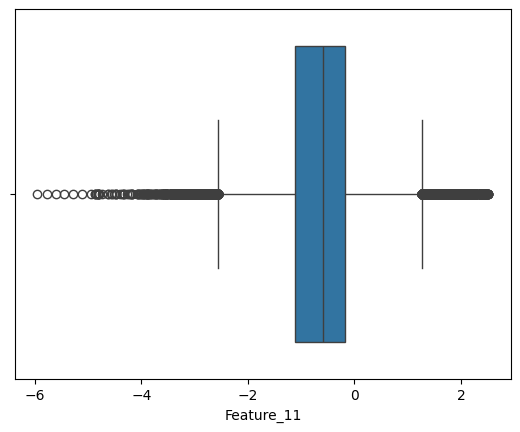

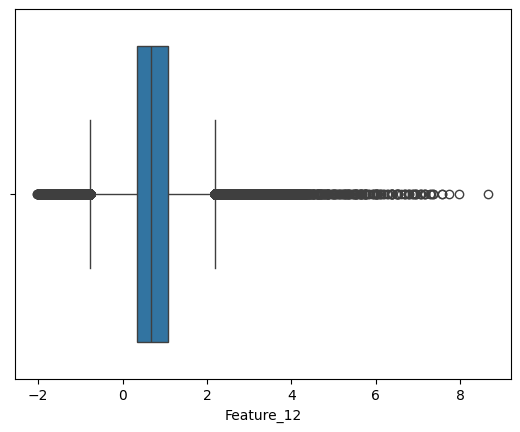

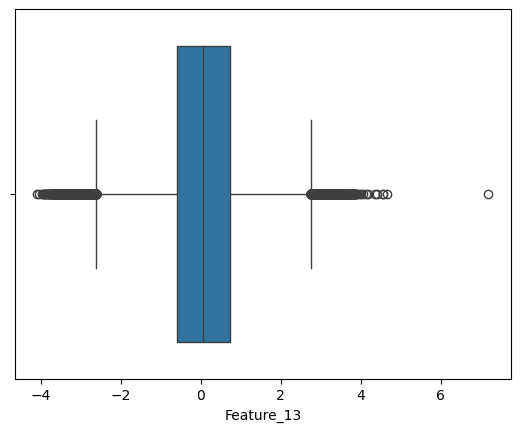

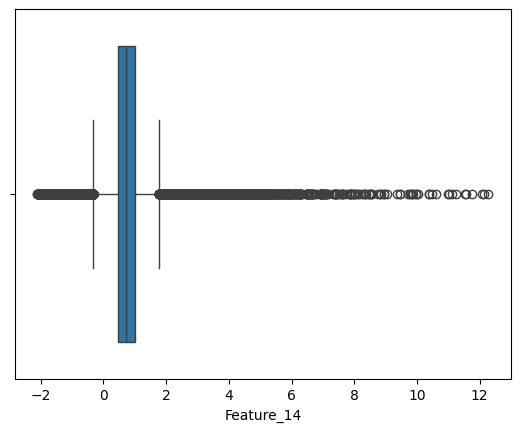

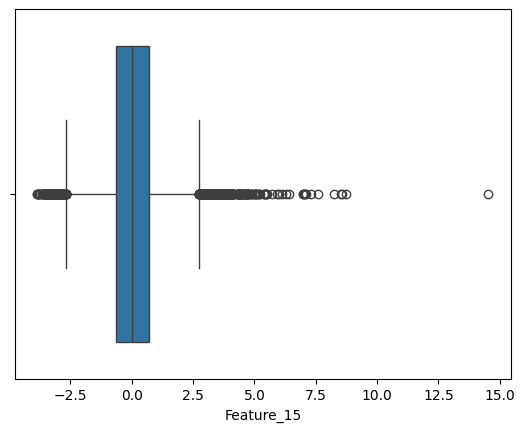

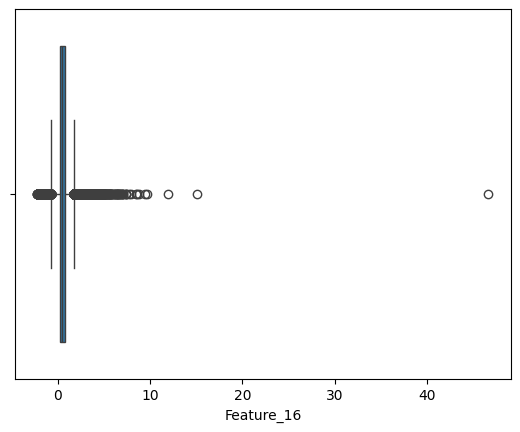

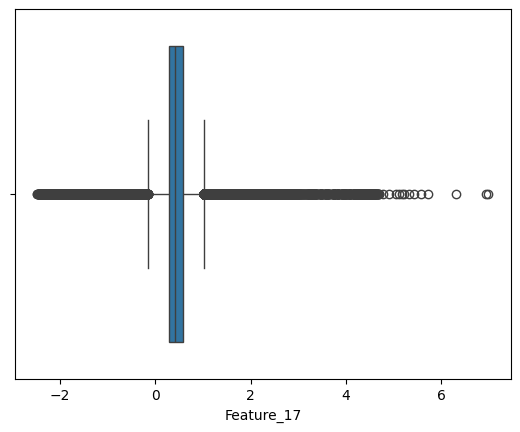

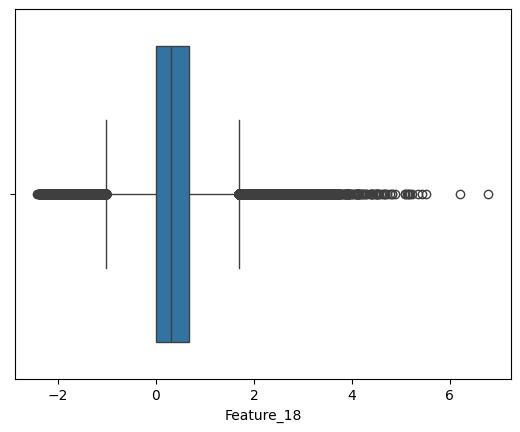

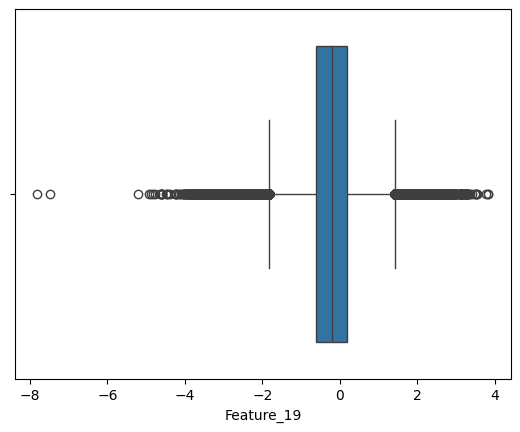

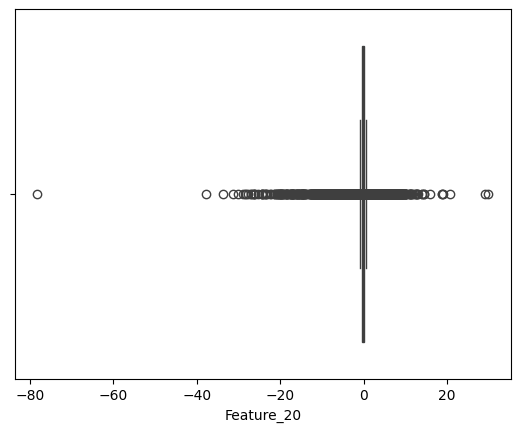

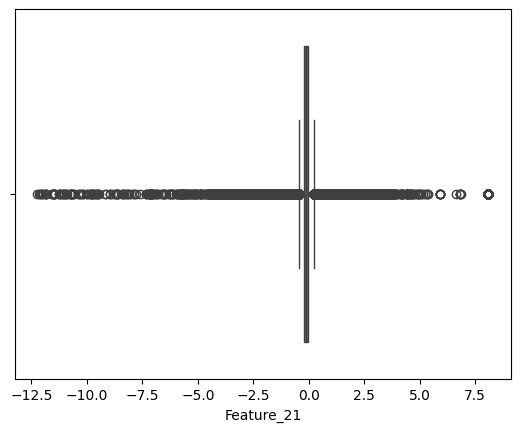

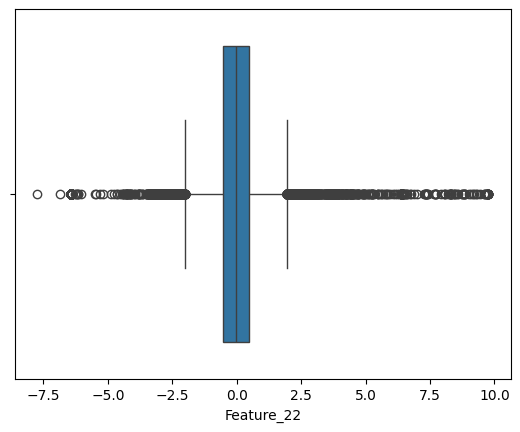

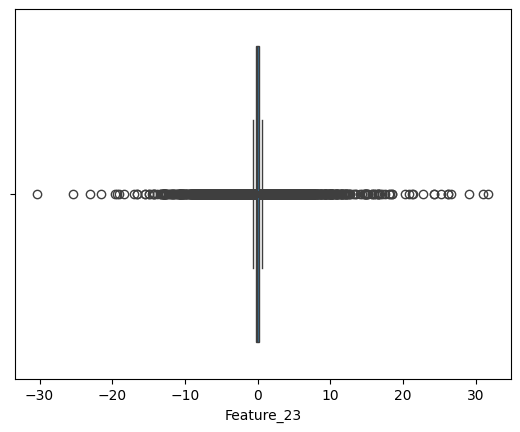

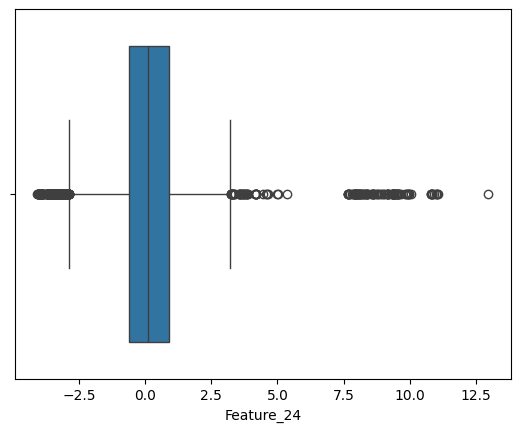

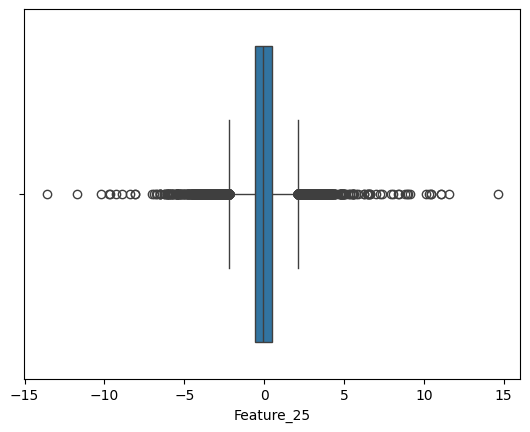

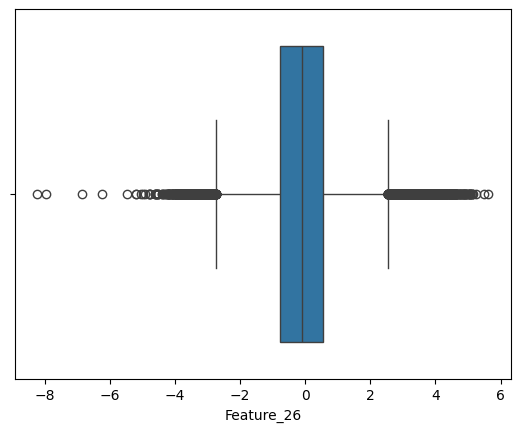

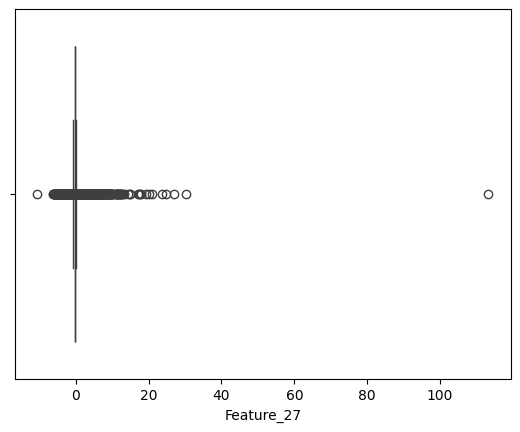

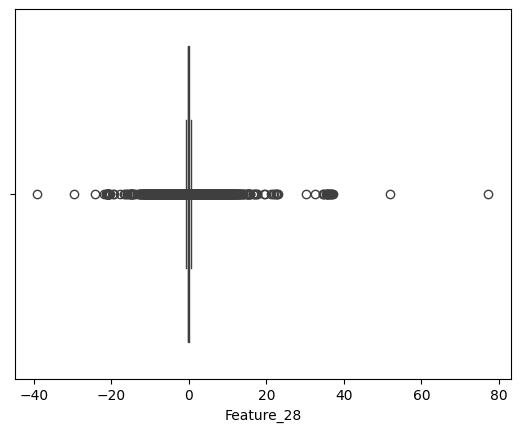

In [16]:
# Histograms for feature distributions (excluding 'id')
X_train_df.hist(bins=50, figsize=(20,15))
plt.show()

# Box plots for the transaction amount
sns.boxplot(x=X_train_df['Amount'])
plt.show()

# Box plots for other features
for col in X_train_df.drop('Amount', axis=1).columns:
    sns.boxplot(x=X_train_df[col])
    plt.show()

# Anomaly Scoring

## Model training

Prototyping with only 10000 instances.

In [17]:
X_train_mini = X_train_df_scaled

In [18]:
print(X_train_mini.shape)

(268677, 29)


In [19]:
X_train_mini.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Amount
0,-0.795981,2.229588,-1.003447,-0.510231,-1.035874,-0.908668,-1.177328,5.767532,0.325084,1.245569,...,0.454833,1.033647,1.079094,1.300126,-0.472860,-0.348563,-0.216507,2.202202,2.264270,-0.530514
1,-0.078453,-0.008918,1.062051,-0.605765,-0.434882,-0.462008,-0.105715,-0.301772,-0.756967,0.683297,...,0.656876,0.604538,0.577800,0.168867,0.495302,-0.860462,-0.461559,0.236641,1.173927,0.256039
2,0.476022,-0.085856,0.377231,1.106474,0.283400,1.683864,-0.376924,1.160690,0.065999,0.496036,...,-0.756379,0.100863,0.253086,0.212590,-1.120106,0.301703,0.386930,0.361155,-0.018020,0.637453
3,0.812854,-1.427981,-0.775127,-1.702281,0.265528,0.463437,0.239304,-0.034265,1.727245,-0.906780,...,1.100024,1.286316,1.216584,-1.046968,-1.678551,0.209649,-0.921647,0.015592,-0.315228,-0.834220
4,-0.200897,0.956859,-0.528194,0.433779,1.192056,0.221055,1.171362,0.571078,-0.622516,-0.401978,...,0.105825,0.242190,0.361994,-0.413668,0.075060,0.134893,-0.660567,1.312298,1.177877,0.090905


In [20]:

training_loader = torch.utils.data.DataLoader(torch.tensor(X_train_mini.values, dtype=torch.float32), batch_size=64, shuffle=True,drop_last=True)




# SVM Model

In [21]:
# Timing and Training the One-Class SVM model

start_time = time.time()
oc_svm = OneClassSVM().fit(X_train_mini[:20000])
oc_svm_duration = time.time() - start_time
print(f"One-Class SVM training time: {oc_svm_duration:.2f} seconds")

One-Class SVM training time: 22.34 seconds


## SVM Evaluation



No positive samples in y_true, true positive value should be meaningless
No positive class found in y_true, recall is set to one for all thresholds.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


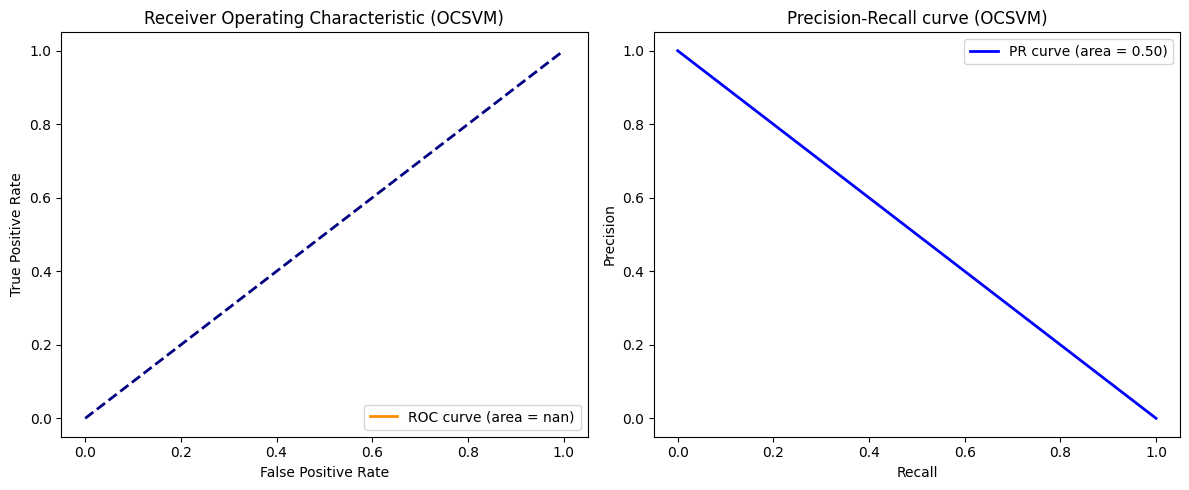

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     20000
           1       0.00      0.00      0.00         0

    accuracy                           0.51     20000
   macro avg       0.50      0.25      0.34     20000
weighted avg       1.00      0.51      0.67     20000



In [22]:
# Predict on the test set
y_pred_test = oc_svm.predict(X_test_df_scaled[:20000])
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test[:20000], y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test[:20000], y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test[:20000], y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

In [23]:


# Add random noise to the dataset
noise_factor = 0.1 # Adjust this value as needed
noise = np.random.normal(0, noise_factor, X_train_mini.shape)
X_train_noisy = X_train_mini + noise

# Training the Isolation Forest model on the noisy dataset
start_time = time.time()
iso_forest = IsolationForest().fit(X_train_noisy)
iso_forest_duration = time.time() - start_time
print(f"Isolation Forest training time with noise: {iso_forest_duration:.2f} seconds")



Isolation Forest training time with noise: 0.32 seconds


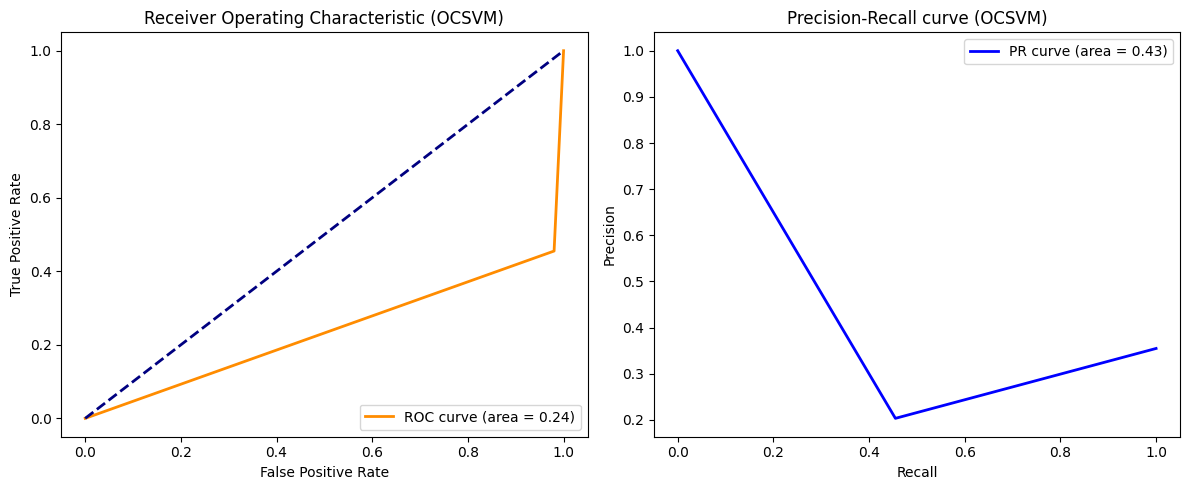

              precision    recall  f1-score   support

           0       0.06      0.02      0.03     28432
           1       0.20      0.46      0.28     15638

    accuracy                           0.17     44070
   macro avg       0.13      0.24      0.16     44070
weighted avg       0.11      0.17      0.12     44070



In [24]:
# Predict on the test set
y_pred_test = iso_forest.predict(X_test_df_scaled)
# Convert predictions to match y_test labels (0 for anomalies, 1 for normal)
y_pred_test = (y_pred_test == 1).astype(int)

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
pr_auc = auc(recall, precision)

# Generate a classification report
class_report = classification_report(y_test, y_pred_test)

# Plotting the ROC and Precision-Recall Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (OCSVM)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve (OCSVM)')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

print(class_report)

##Autoencoder

In [25]:



class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(29, 16),
            nn.ReLU(),
            nn.Linear(16, 12),
            nn.ReLU(),
            nn.Linear(12, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 12),
            nn.ReLU(),
            nn.Linear(12, 16),
            nn.ReLU(),
            nn.Linear(16, 29),
            nn.Sigmoid()
        )
        # Initialize weights using Xavier initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


modelAutoencoder = Autoencoder()





In [26]:
learning_rates = [0.0001]
epochs = 15
criterion = nn.MSELoss()

for lr in learning_rates:
    optimizer = torch.optim.Adam(modelAutoencoder.parameters(), lr=lr,weight_decay=1e-05)

    for epoch in range(epochs):
        for batch in training_loader:
            inputs = batch.float()

            # Model forward pass
            outputs = modelAutoencoder(inputs)

            loss = criterion(outputs, inputs)

            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()


print(f'Learning Rate: {lr} , Loss: {loss.item():.4f}')





Learning Rate: 0.0001 , Loss: 1.4329


### Sparse Autoencoder

In [27]:
class SparseAutoencoder(nn.Module):
    def __init__(self, sparsity_level=0.05, sparsity_weight=0.01):
        super(SparseAutoencoder, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(29, 25),
            nn.ReLU(),
            nn.Linear(25, 20),
            nn.ReLU(),
            nn.Linear(20, 15),
            nn.ReLU()
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(15, 20),
            nn.ReLU(),
            nn.Linear(20, 25),
            nn.ReLU(),
            nn.Linear(25, 29),
            nn.Sigmoid()
        )

        self.sparsity_level = sparsity_level
        self.sparsity_weight = sparsity_weight

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def sparsity_loss(self, encoded):
        # Calculate average activation
        avg_activation = torch.mean(encoded, dim=0)

        # Sparsity loss
        sparsity_loss = self.sparsity_level * torch.sum(self.sparsity_weight * torch.log(self.sparsity_weight / avg_activation) + (1 - self.sparsity_weight) * torch.log((1 - self.sparsity_weight) / (1 - avg_activation)))

        return sparsity_loss



In [28]:



# Instantiate the model, optimizer, and loss function
modelSparseAuto = SparseAutoencoder()
optimizer = optim.Adam(modelSparseAuto.parameters(), lr=0.00001)
criterion = nn.MSELoss()

# Training loop with early stopping
num_epochs = 15
best_loss = float('inf')
patience = 3
epochs_without_improvement = 0

for epoch in range(num_epochs):
    modelSparseAuto.train()
    total_loss = 0.0

    for batch_data in training_loader:
        inputs = batch_data[0]

        optimizer.zero_grad()

        outputs = modelSparseAuto(inputs)  # Unpack only the 'outputs' (reconstructed data)

        reconstruction_loss = criterion(outputs, inputs)
        sparsity_loss = modelSparseAuto.sparsity_loss(modelSparseAuto.encoder(inputs))

        loss = reconstruction_loss + sparsity_loss

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        average_loss = total_loss / len(training_loader)



    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {average_loss:.4f}, Validation Loss: {best_loss:.4f}")

    # Check for early stopping
    if average_loss <= best_loss:
        best_loss = average_loss
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print("Early stopping triggered!")
        break

print("Training complete!")



Epoch [1/15], Training Loss: nan, Validation Loss: inf
Epoch [2/15], Training Loss: 2.3574, Validation Loss: inf
Epoch [3/15], Training Loss: 2.6195, Validation Loss: 2.3574
Epoch [4/15], Training Loss: 2.1920, Validation Loss: 2.3574
Epoch [5/15], Training Loss: 2.3770, Validation Loss: 2.1920
Epoch [6/15], Training Loss: 2.1141, Validation Loss: 2.1920
Epoch [7/15], Training Loss: 2.2705, Validation Loss: 2.1141
Epoch [8/15], Training Loss: 2.4294, Validation Loss: 2.1141
Epoch [9/15], Training Loss: 1.8960, Validation Loss: 2.1141
Epoch [10/15], Training Loss: 2.2594, Validation Loss: 1.8960
Epoch [11/15], Training Loss: 1.8140, Validation Loss: 1.8960
Epoch [12/15], Training Loss: 2.1144, Validation Loss: 1.8140
Epoch [13/15], Training Loss: 2.2445, Validation Loss: 1.8140
Epoch [14/15], Training Loss: nan, Validation Loss: 1.8140
Early stopping triggered!
Training complete!


# Denoising Autoencoder

In [29]:



class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(29, 16),
            nn.ReLU(),
            nn.Linear(16, 12),
            nn.ReLU(),
            nn.Linear(12, 8),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 12),
            nn.ReLU(),
            nn.Linear(12, 16),
            nn.ReLU(),
            nn.Linear(16, 29),
            nn.Sigmoid()
        )

        # Initialize weights using Xavier initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def denoising_loss(self, clean_data, noisy_data, recon_data):
        # Compute reconstruction loss between clean data and reconstructed data
        reconstruction_loss = F.mse_loss(recon_data, clean_data, reduction='mean')
        # Alternatively, you can use other loss functions like L1 loss for better performance in some cases
        # reconstruction_loss = F.l1_loss(recon_data, clean_data, reduction='mean')
        return reconstruction_loss


In [30]:
from torch.utils.data import DataLoader, TensorDataset
def add_noise(data_tensor, noise_factor=0.1):
    noise = torch.randn_like(data_tensor) * noise_factor
    noisy_data = data_tensor + noise
    return noisy_data

def train_denoising_autoencoder(model, train_data_tensor, batch_size=64, lr=0.001, num_epochs=50):
    # Create DataLoader for batch training
    noisy_train_data_tensor = add_noise(train_data_tensor)
    train_dataset = TensorDataset(noisy_train_data_tensor, train_data_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(model.parameters(), lr=lr)
    best_loss = float('inf')
    patience=3
    epochs_without_improvement = 0
    # Training loop
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0

        for noisy_data, clean_data in train_loader:
            # Forward pass
            recon_data = model(noisy_data)

            # Compute reconstruction loss
            loss = model.denoising_loss(clean_data, noisy_data, recon_data)
            total_loss += loss.item()

            # Zero the gradients, perform a backward pass, and update the weights
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Compute average loss for the epoch
        average_loss = total_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {average_loss:.4f}, best loss{best_loss:.4}")
        # Check for early stopping
        if average_loss <= best_loss:
            best_loss = average_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print("Early stopping triggered!")
            break

    print("Training complete!")

In [31]:

# Create an instance of the DenoisingAutoencoder model
modelDenoisingAuto = DenoisingAutoencoder()
train_data_tensor = torch.tensor(X_train_mini.values, dtype=torch.float32)

# Set hyperparameters
batch_size = 64
lr = 0.001
num_epochs = 15

# Call the training function
train_denoising_autoencoder(modelDenoisingAuto, train_data_tensor, batch_size=batch_size, lr=lr, num_epochs=num_epochs)


Epoch [1/15], Average Loss: 2.0640, best lossinf
Epoch [2/15], Average Loss: 1.9934, best loss2.064
Epoch [3/15], Average Loss: 1.9777, best loss1.993
Epoch [4/15], Average Loss: 1.9666, best loss1.978
Epoch [5/15], Average Loss: 1.9609, best loss1.967
Epoch [6/15], Average Loss: 1.9560, best loss1.961
Epoch [7/15], Average Loss: 1.9524, best loss1.956
Epoch [8/15], Average Loss: 1.9456, best loss1.952
Epoch [9/15], Average Loss: 1.9433, best loss1.946
Epoch [10/15], Average Loss: 1.9372, best loss1.943
Epoch [11/15], Average Loss: 1.9353, best loss1.937
Epoch [12/15], Average Loss: 1.9339, best loss1.935
Epoch [13/15], Average Loss: 1.9415, best loss1.934
Epoch [14/15], Average Loss: 1.9315, best loss1.934
Epoch [15/15], Average Loss: 1.9304, best loss1.932
Training complete!


# Variational Autoencoder

In [41]:


class modelVAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(modelVAE, self).__init__()
        self.input_dim = input_dim
        self.latent_dim = latent_dim

        # Encoder layers
        self.fc1 = nn.Linear(input_dim, 128)  # Increased neurons
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)  # Increased neurons
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)  # Increased neurons
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)

        self.fc21 = nn.Linear(32, latent_dim)
        self.fc22 = nn.Linear(32, latent_dim)

        # Decoder layers
        self.fc4 = nn.Linear(latent_dim, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.dropout4 = nn.Dropout(0.2)

        self.fc5 = nn.Linear(32, 64)  # Increased neurons
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout5 = nn.Dropout(0.3)

        self.fc6 = nn.Linear(64, 128)  # Increased neurons
        self.bn6 = nn.BatchNorm1d(128)
        self.dropout6 = nn.Dropout(0.3)

        self.fc7 = nn.Linear(128, input_dim)

    def encode(self, x):
        h1 = F.relu(self.bn1(self.fc1(x)))
        h1 = self.dropout1(h1)

        h2 = F.relu(self.bn2(self.fc2(h1)))
        h2 = self.dropout2(h2)

        h3 = F.relu(self.bn3(self.fc3(h2)))
        h3 = self.dropout3(h3)

        return self.fc21(h3), self.fc22(h3)

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h4 = F.relu(self.bn4(self.fc4(z)))
        h4 = self.dropout4(h4)

        h5 = F.relu(self.bn5(self.fc5(h4)))
        h5 = self.dropout5(h5)

        h6 = F.relu(self.bn6(self.fc6(h5)))
        h6 = self.dropout6(h6)

        return torch.sigmoid(self.fc7(h6))

    def forward(self, x):
        mu, log_var = self.encode(x.view(-1, self.input_dim))
        z = self.reparameterize(mu, log_var)
        return self.decode(z), mu, log_var






In [42]:

# Define the model
input_dim = 29
latent_dim = 29  # Adjusted latent dimension
modelVAEncoder = modelVAE(input_dim, latent_dim)

In [43]:

modelVAECleaned = modelVAE(input_dim, latent_dim)

In [44]:


def train_model(model, training_loader, learning_rates, epochs, input_dim):
    criterion = nn.MSELoss()
    train_losses = []

    for lr in learning_rates:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-05)

        for epoch in range(epochs):
            epoch_loss = 0.0

            for batch in training_loader:
                inputs = batch.float()

                # Model forward pass
                recon_batch, mu, log_var = model(inputs)

                # Compute the loss: Reconstruction loss + KL divergence
                # Reconstruction loss
                recon_loss = criterion(recon_batch, inputs.view(-1, input_dim))

                # KL divergence
                kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())

                # Total loss
                loss = recon_loss + kl_divergence
                epoch_loss += loss.item()

                # Backpropagation and optimization
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            train_losses.append(epoch_loss / len(training_loader))
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_losses[-1]:.4f}, Recon Loss: {recon_loss.item():.4f}, KL Div: {kl_divergence.item():.4f}')

        print(f'Learning Rate: {lr}, Final Loss: {train_losses[-1]:.4f}')

    return train_losses



In [45]:
# Define parameters
learning_rates = [0.00001]
epochs = 10

# training_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Call the train_model function
train_losses = train_model(modelVAEncoder, training_loader, learning_rates, epochs, input_dim)


Epoch [1/10], Loss: 172.2742, Recon Loss: 2.6617, KL Div: 56.6997
Epoch [2/10], Loss: 32.0808, Recon Loss: 2.0387, KL Div: 8.6504
Epoch [3/10], Loss: 9.7222, Recon Loss: 2.0197, KL Div: 3.7536
Epoch [4/10], Loss: 4.7203, Recon Loss: 1.1449, KL Div: 1.2963
Epoch [5/10], Loss: 3.1235, Recon Loss: 1.8601, KL Div: 0.6716
Epoch [6/10], Loss: 2.5441, Recon Loss: 3.5709, KL Div: 0.2200
Epoch [7/10], Loss: 2.3575, Recon Loss: 5.1383, KL Div: 0.0196
Epoch [8/10], Loss: 2.2930, Recon Loss: 2.9035, KL Div: 0.0024
Epoch [9/10], Loss: 2.2701, Recon Loss: 3.2086, KL Div: 0.0001
Epoch [10/10], Loss: 2.2611, Recon Loss: 1.5582, KL Div: 0.0001
Learning Rate: 1e-05, Final Loss: 2.2611


# GAN

In [37]:
# Generator Network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(29, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 29),
            nn.Tanh()
        )


    def forward(self, z):
        return self.model(z)

# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(29, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)



# Initialize Generator and Discriminator
generator = Generator()
discriminator = Discriminator()

In [38]:


# Generator Network without Residual Connection and Dropout
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 70)
        self.fc2 = nn.Linear(70, 50)
        self.fc3 = nn.Linear(50, 36)
        self.fc4 = nn.Linear(36, 29)
        self.dropout = nn.Dropout(p=0.5)
        self.model = nn.Sequential(
            self.fc1,
            nn.ReLU(),
            self.fc2,
            nn.ReLU(),
            self.fc3,
            nn.ReLU(),
            self.fc4,
            self.dropout
        )

    def forward(self, z):
        return self.model(z)

# Discriminator Network without Residual Connection and Dropout
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(29, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.dropout = nn.Dropout(p=0.5)
        self.model = nn.Sequential(
            self.fc1,
            nn.ReLU(),
            self.fc2,
            nn.ReLU(),
            self.fc3,
            self.dropout
        )

    def forward(self, x):
        out = self.model(x)
        out = torch.sigmoid(out)  # Apply sigmoid activation
        return out




# Initialize Generator and Discriminator
generator = Generator()
discriminator = Discriminator()




In [39]:

# Loss Function and Optimizers
criterion = nn.BCELoss()
# For Weight Decay (L2 regularization)
optimizer_g = optim.Adam(generator.parameters(), lr=0.0005, weight_decay=1e-5)
optimizer_d = optim.Adam(discriminator.parameters(), lr=0.0005, weight_decay=1e-5)


# Training Loop
num_epochs = 10
batch_size = 64

update_discriminator = True  # Flag to track when to update discriminator

for epoch in range(num_epochs):
    for real_data in training_loader:


        # Update Discriminator every second iteration
        if update_discriminator:
            # Train Discriminator
            optimizer_d.zero_grad()

            # Real data
            real_labels = torch.ones(batch_size, 1)
            real_output = discriminator(real_data)
            d_loss_real = criterion(real_output, real_labels)

            # Fake data
            z = torch.randn(batch_size, 100)
            fake_data = generator(z).detach()  # Detach to avoid backprop through G
            fake_labels = torch.zeros(batch_size, 1)
            fake_output = discriminator(fake_data)
            d_loss_fake = criterion(fake_output, fake_labels)

            # Total Discriminator Loss
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_d.step()

        # Train Generator
        optimizer_g.zero_grad()

        z = torch.randn(batch_size, 100)
        fake_data = generator(z)
        fake_output = discriminator(fake_data)
        g_loss = criterion(fake_output, real_labels)

        g_loss.backward()
        optimizer_g.step()

        # Toggle the discriminator update flag
        update_discriminator = not update_discriminator


    # Print progress

        print(f"Epoch [{epoch+1}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}")




Streaming output truncated to the last 5000 lines.
Epoch [9/10], d_loss: 1.3603, g_loss: 0.7600
Epoch [9/10], d_loss: 1.3603, g_loss: 0.7721
Epoch [9/10], d_loss: 1.3500, g_loss: 0.7828
Epoch [9/10], d_loss: 1.3500, g_loss: 0.7904
Epoch [9/10], d_loss: 1.3357, g_loss: 0.7744
Epoch [9/10], d_loss: 1.3357, g_loss: 0.7994
Epoch [9/10], d_loss: 1.3254, g_loss: 0.8011
Epoch [9/10], d_loss: 1.3254, g_loss: 0.7574
Epoch [9/10], d_loss: 1.3568, g_loss: 0.7416
Epoch [9/10], d_loss: 1.3568, g_loss: 0.7616
Epoch [9/10], d_loss: 1.3739, g_loss: 0.7977
Epoch [9/10], d_loss: 1.3739, g_loss: 0.8035
Epoch [9/10], d_loss: 1.3469, g_loss: 0.7698
Epoch [9/10], d_loss: 1.3469, g_loss: 0.8009
Epoch [9/10], d_loss: 1.3054, g_loss: 0.7552
Epoch [9/10], d_loss: 1.3054, g_loss: 0.7680
Epoch [9/10], d_loss: 1.3194, g_loss: 0.7597
Epoch [9/10], d_loss: 1.3194, g_loss: 0.7594
Epoch [9/10], d_loss: 1.3390, g_loss: 0.7772
Epoch [9/10], d_loss: 1.3390, g_loss: 0.7664
Epoch [9/10], d_loss: 1.3459, g_loss: 0.7701
Epoc

In [46]:


def evaluate_gan_discriminator(discriminator, generator, X_test, y_test, threshold):
    # Generate synthetic data using the GAN's generator
    with torch.no_grad():
        z = torch.randn(X_test.shape[0], 100)
        synthetic_data_tensor = generator(z)

    # Forward pass to get discriminator's outputs for real and synthetic data
    with torch.no_grad():
        real_output = discriminator(X_test)
        print(real_output)
        synthetic_output = discriminator(synthetic_data_tensor)

    # Combine real and synthetic outputs for reconstruction errors
    combined_outputs = torch.cat([real_output, synthetic_output], dim=0).numpy()
    combined_labels = np.concatenate([np.ones(X_test.shape[0]), np.zeros(X_test.shape[0])])

    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(combined_labels, combined_outputs)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(combined_labels, combined_outputs)
    pr_auc = auc(recall, precision)

    # Thresholding based on reconstruction errors
    threshold = np.percentile(combined_outputs, threshold)  # Using the 95th percentile as the threshold
    print(f"Selected Threshold: {threshold:.4f}")

    # Classify as anomaly (1) or not (0)
    y_pred = (combined_outputs > threshold).astype(int)

    # Generate a classification report
    class_report = classification_report(combined_labels, y_pred)

    # Print results
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"Precision-Recall AUC: {pr_auc:.2f}")
    print("\nClassification Report:")
    print(class_report)

    # Plotting the ROC and Precision-Recall Curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()




tensor([[0.5000],
        [0.7468],
        [0.7292],
        ...,
        [0.5000],
        [0.9405],
        [0.5000]])
Selected Threshold: 0.2480
ROC AUC: 0.74
Precision-Recall AUC: 0.78

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.18      0.30     44070
         1.0       0.55      0.98      0.70     44070

    accuracy                           0.58     88140
   macro avg       0.73      0.58      0.50     88140
weighted avg       0.73      0.58      0.50     88140



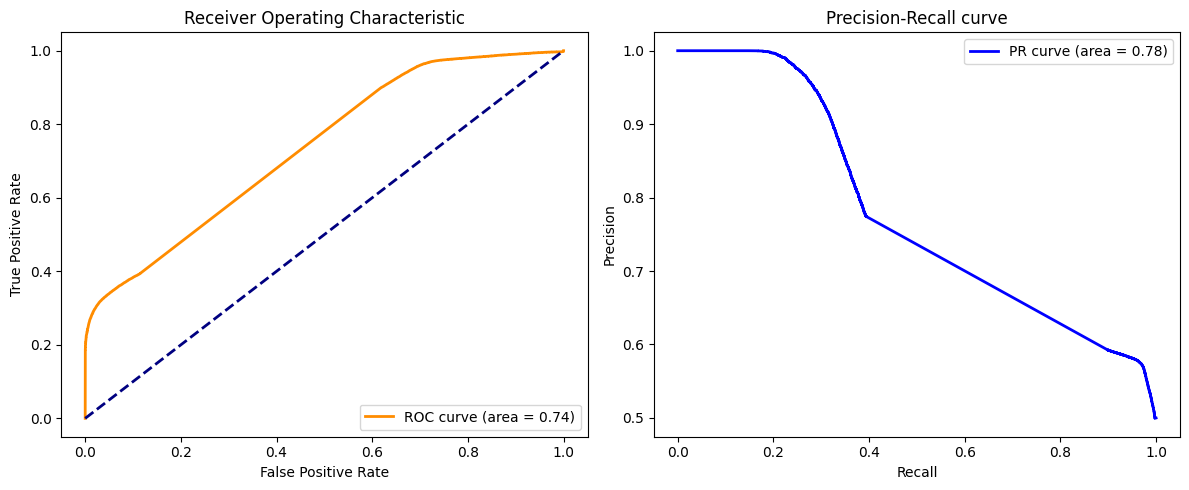

In [49]:
# Convert DataFrame to PyTorch tensor
X_test_tensor = torch.tensor(X_test_df_scaled.values).float()
evaluate_gan_discriminator(discriminator, generator, X_test_tensor, y_test,10)

## Evaluation

In [48]:
def compute_reconstruction_error(model, data):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        data_tensor = torch.tensor(data.values, dtype=torch.float32)  # Convert DataFrame to tensor
        output = model(data_tensor)  # Assuming the VAE model returns a tuple or a single tensor

        # Check if the output is a tuple
        if isinstance(output, tuple):
            # Convert each tensor in the tuple to a numpy array
            reconstructed_data = tuple(o.detach().numpy() for o in output)

            # Compute error for each output
            errors = [np.linalg.norm(data.values - r, axis=1) for r in reconstructed_data]



            # Sum the errors across all outputs
            error = np.sum(errors, axis=0)
        else:
            # Convert the tensor output to a numpy array
            reconstructed_data = output.detach().numpy()
            error = np.linalg.norm(data.values - reconstructed_data, axis=1)

    return error







In [50]:


def evaluate_autoencoder(model, X_test_df_scaled, y_test, threshold):
    reconstruction_errors = compute_reconstruction_error(model, X_test_df_scaled)

    # Set a threshold (e.g., mean + 2*std of the reconstruction errors)
    #threshold = np.mean(reconstruction_errors) + 2 * np.std(reconstruction_errors)

    threshold = np.percentile(reconstruction_errors, threshold)
    # Identify anomalies
    anomalies_indices = np.where(reconstruction_errors > threshold)[0]
    num_anomalies_detected = len(anomalies_indices)
    print(f"Number of anomalies detected: {num_anomalies_detected}")

    # Create a fraud list initialized with zeros
    fraud_list = [0] * len(X_test_df_scaled)

    # Update the list with 1s for the detected anomalies
    for index in anomalies_indices:
        fraud_list[index] = 1

    fraud_array = np.array(fraud_list)

    # Calculate ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, fraud_array)
    roc_auc = auc(fpr, tpr)

    # Calculate Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(y_test, fraud_array)
    pr_auc = auc(recall, precision)

    # Generate a classification report
    class_report = classification_report(y_test, fraud_array)

    # Plotting the ROC and Precision-Recall Curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

    # Print classification report
    print(class_report)
    # Convert numpy array to pandas Series
    fraud_series = pd.Series(fraud_array)

    # Extract feature amounts for the undetected fraud transactions
    undetected_fraud_amounts = X_train_df.iloc[fraud_series[fraud_series == 1].index]['Amount'].values

    # Calculate total amount lost due to undetected fraud
    total_misclassification_cost = sum(undetected_fraud_amounts)

    # Print the total misclassification cost
    normalize = False
    print(f"Total amount lost due to undetected fraud: € {total_misclassification_cost:.2f}")
    cm = confusion_matrix(y_test, fraud_array)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'
    classes = ['Fraud', 'Non Fraud']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True,fmt=".4f", cmap=plt.cm.Blues)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(np.arange(len(classes)) + 0.5, classes)
    plt.yticks(np.arange(len(classes)) + 0.5, classes)
    plt.show()

In [51]:
def clean_data_with_threshold(data, threshold, model):
    cleaned_data = []
    reconstruction_errors = compute_reconstruction_error(model, data)
    threshold = np.percentile(reconstruction_errors, threshold)
    anomalies_indices = np.where(reconstruction_errors > threshold)[0]
    print("Anomalies Indices:", anomalies_indices)
    print("Original Data Shape:", data.shape)

    for i in range(len(data)):
        if i not in anomalies_indices:
            cleaned_data.append(data.iloc[i])

    cleaned_data = pd.DataFrame(cleaned_data)  # Convert list back to DataFrame
    print("Cleaned Data Shape:", cleaned_data.shape)
    return cleaned_data

Number of anomalies detected: 17628


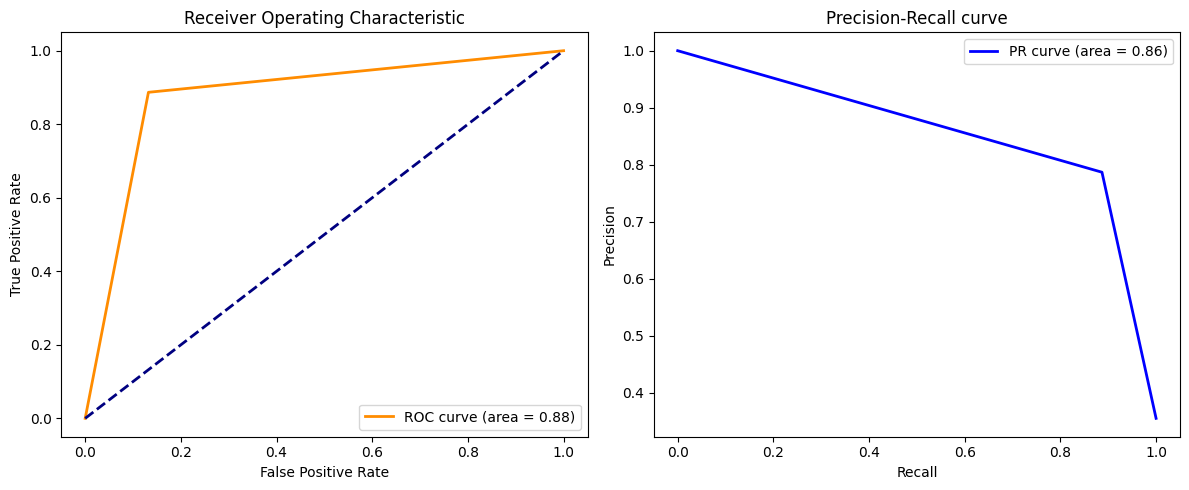

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     28432
           1       0.79      0.89      0.83     15638

    accuracy                           0.87     44070
   macro avg       0.86      0.88      0.87     44070
weighted avg       0.88      0.87      0.88     44070

Total amount lost due to undetected fraud: € 212045256.34


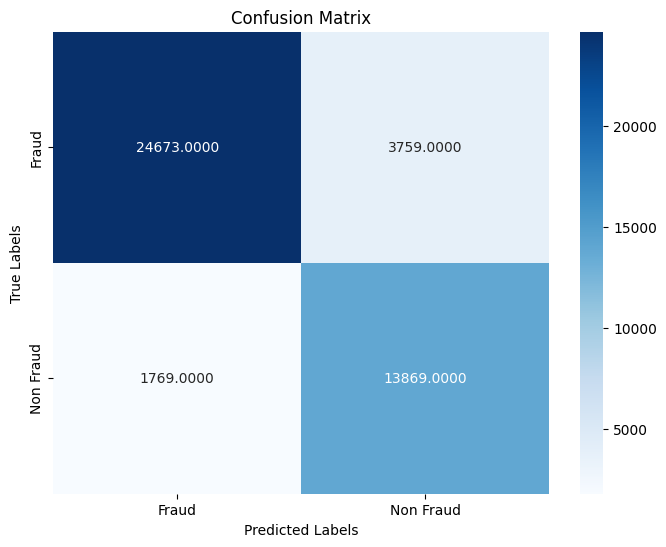

In [52]:

evaluate_autoencoder(modelAutoencoder, X_test_df_scaled, y_test,60)

Number of anomalies detected: 17628


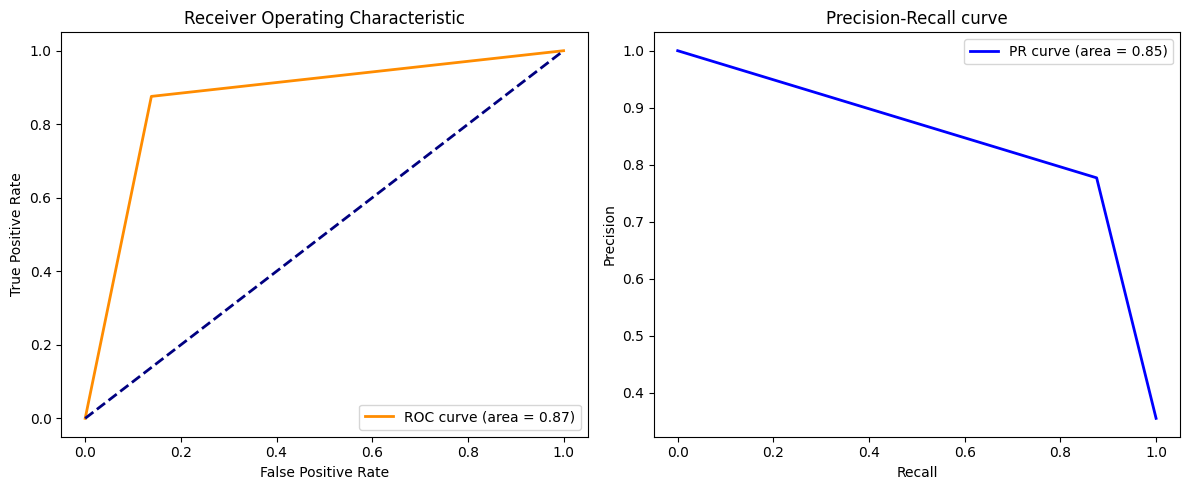

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     28432
           1       0.78      0.88      0.82     15638

    accuracy                           0.87     44070
   macro avg       0.85      0.87      0.86     44070
weighted avg       0.87      0.87      0.87     44070

Total amount lost due to undetected fraud: € 212149887.31


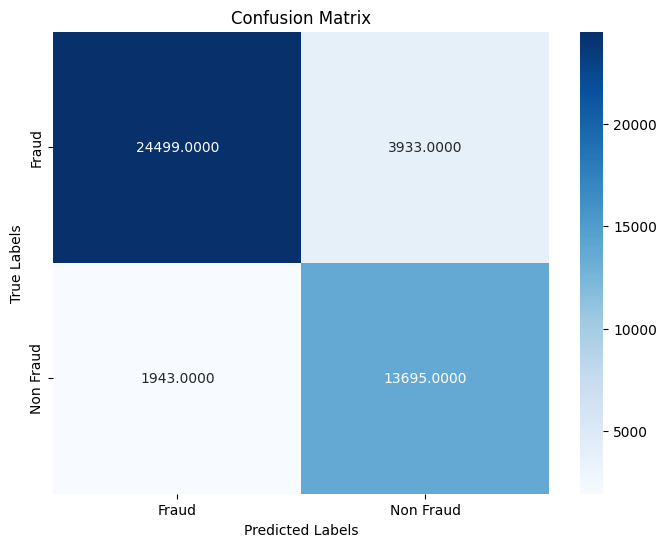

In [53]:
evaluate_autoencoder(modelSparseAuto, X_test_df_scaled, y_test,60)

Number of anomalies detected: 16747


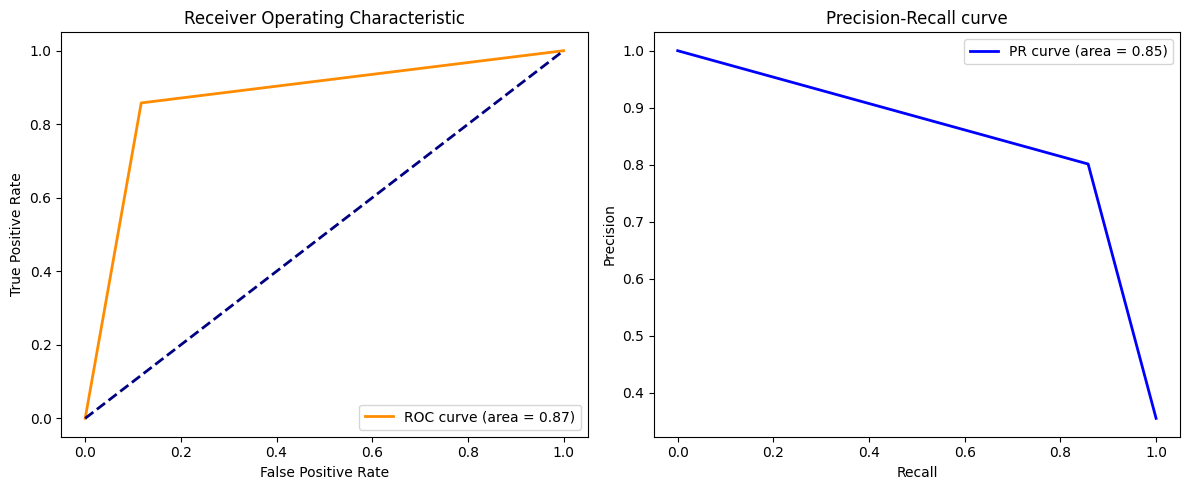

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     28432
           1       0.80      0.86      0.83     15638

    accuracy                           0.87     44070
   macro avg       0.86      0.87      0.86     44070
weighted avg       0.88      0.87      0.87     44070

Total amount lost due to undetected fraud: € 201530508.08


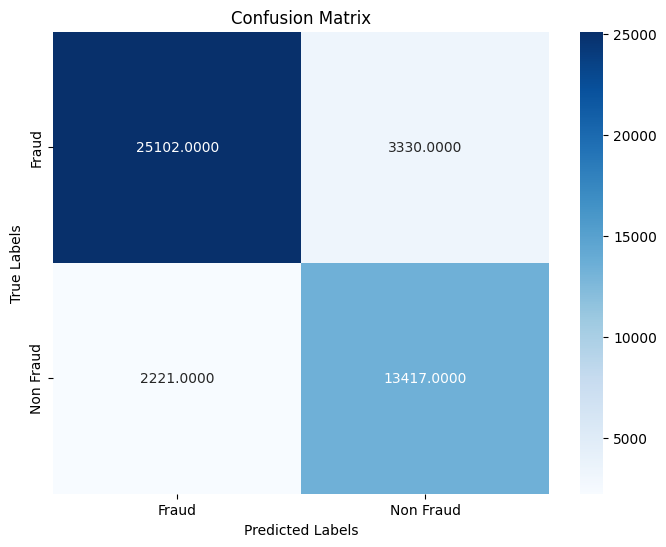

In [54]:
evaluate_autoencoder(modelDenoisingAuto, X_test_df_scaled, y_test, 62)

Number of anomalies detected: 16747


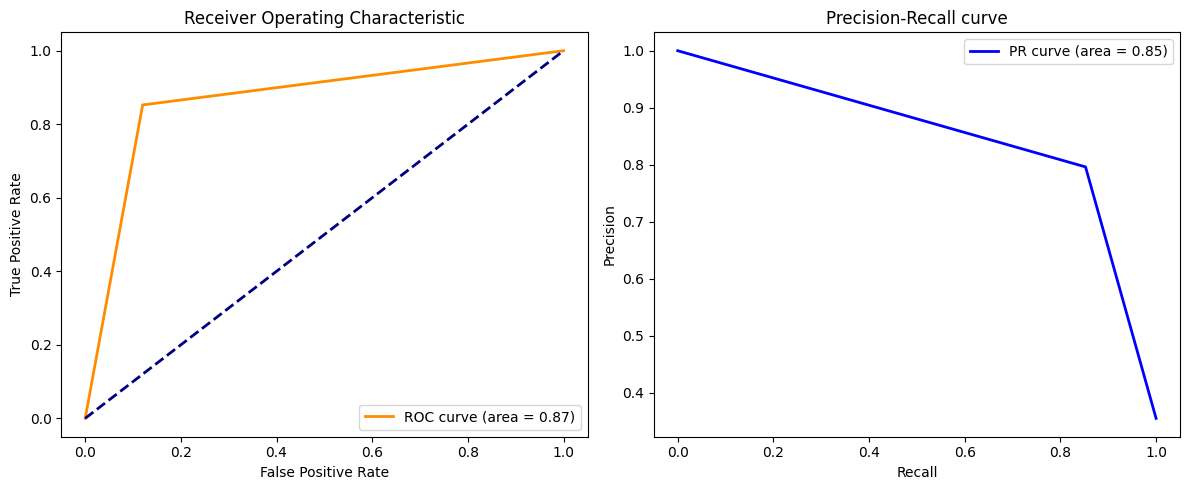

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     28432
           1       0.80      0.85      0.82     15638

    accuracy                           0.87     44070
   macro avg       0.86      0.87      0.86     44070
weighted avg       0.87      0.87      0.87     44070

Total amount lost due to undetected fraud: € 201537771.32


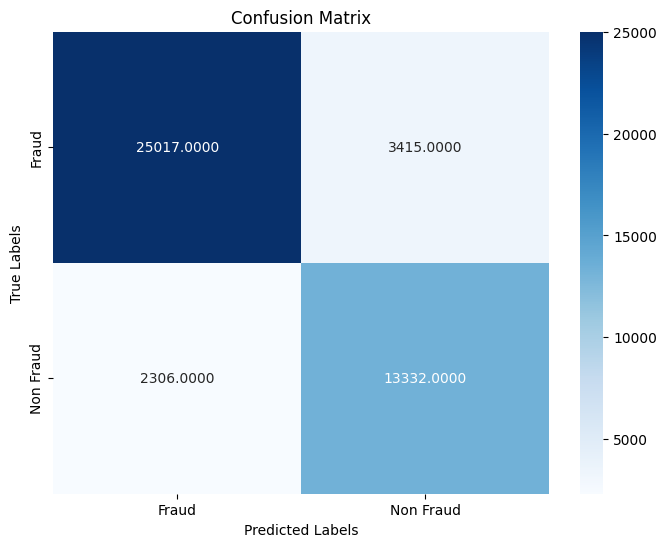

In [55]:
evaluate_autoencoder(modelVAEncoder, X_test_df_scaled, y_test,62
                     )

# **Some Clean Subtext** (needs to be changed)

In [56]:
cleaned_data= clean_data_with_threshold(X_test_df_scaled, 60,modelVAEncoder)

Anomalies Indices: [    0    27    42 ... 44067 44068 44069]
Original Data Shape: (44070, 29)
Cleaned Data Shape: (26442, 29)


In [63]:

training_loader_Cleaned = torch.utils.data.DataLoader(torch.tensor(cleaned_data.values, dtype=torch.float32), batch_size=64, shuffle=True,drop_last=True)

In [64]:
# Define parameters
learning_rates = [0.00001]
epochs = 10

# training_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Call the train_model function
train_losses = train_model(modelVAECleaned, training_loader_Cleaned, learning_rates, epochs, input_dim)


Epoch [1/10], Loss: 291.1572, Recon Loss: 0.8006, KL Div: 260.0497
Epoch [2/10], Loss: 250.0184, Recon Loss: 0.7802, KL Div: 228.8412
Epoch [3/10], Loss: 219.0016, Recon Loss: 0.6948, KL Div: 214.4141
Epoch [4/10], Loss: 193.9140, Recon Loss: 0.6866, KL Div: 179.4355
Epoch [5/10], Loss: 173.4550, Recon Loss: 0.6115, KL Div: 151.7593
Epoch [6/10], Loss: 154.9247, Recon Loss: 0.5798, KL Div: 147.7315
Epoch [7/10], Loss: 140.3211, Recon Loss: 0.6808, KL Div: 134.3959
Epoch [8/10], Loss: 126.4962, Recon Loss: 0.6586, KL Div: 124.7772
Epoch [9/10], Loss: 114.8805, Recon Loss: 0.6846, KL Div: 115.2360
Epoch [10/10], Loss: 104.3846, Recon Loss: 0.5832, KL Div: 104.7847
Learning Rate: 1e-05, Final Loss: 104.3846


Number of anomalies detected: 16747


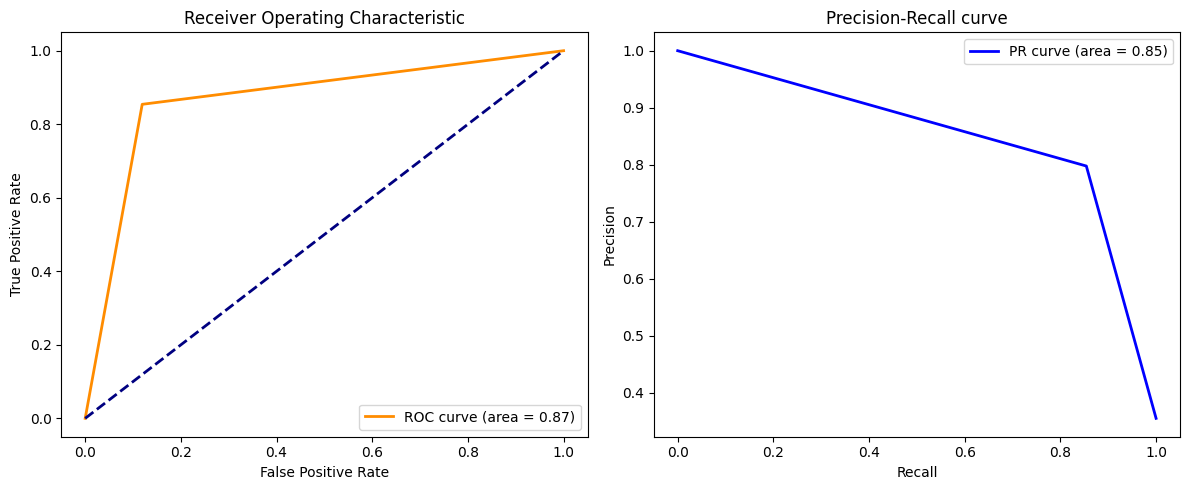

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     28432
           1       0.80      0.85      0.82     15638

    accuracy                           0.87     44070
   macro avg       0.86      0.87      0.86     44070
weighted avg       0.87      0.87      0.87     44070

Total amount lost due to undetected fraud: € 201593576.29


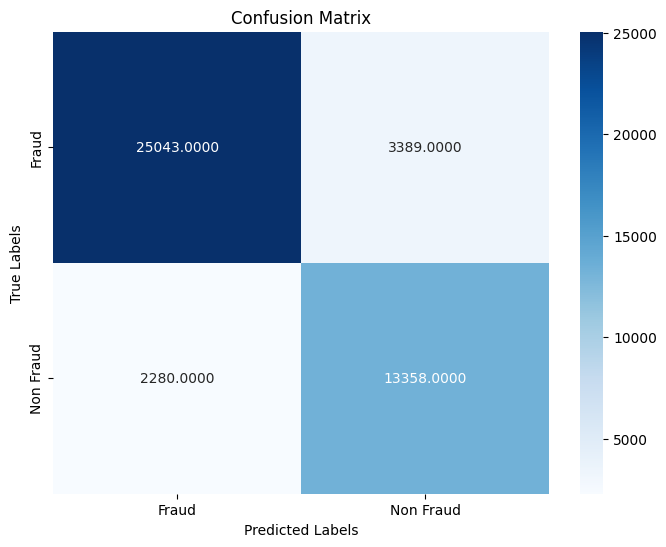

In [65]:
evaluate_autoencoder(modelVAECleaned, X_test_df_scaled, y_test,62
                     )

Train data - Mean: 0.23297893425607963 , Standard Deviation: 0.6956594880429811 , Kurtosis: -0.6081933813451439
Cleaned data - Mean: 0.37522048760044285 , Standard Deviation: 0.6157584524101013 , Kurtosis: -1.3261976217399152


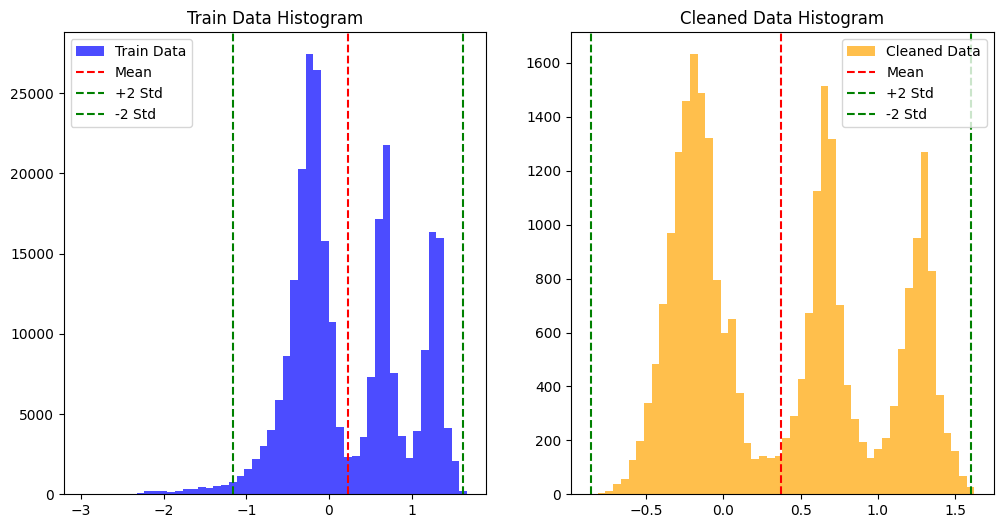

In [68]:


# Feature 0 in the train data
feature_0_train = X_train_mini.Feature_1
mean_train = np.mean(feature_0_train)
std_train = np.std(feature_0_train)
kurtosis_train = kurtosis(feature_0_train)


# Feature 0 in the cleaned data
feature_0_cleaned = cleaned_data.Feature_1  # Assuming cleaned_data is the array containing cleaned data
mean_cleaned = np.mean(feature_0_cleaned)
std_cleaned = np.std(feature_0_cleaned)
kurtosis_cleaned = kurtosis(feature_0_cleaned)

# Print statistics
print("Train data - Mean:", mean_train, ", Standard Deviation:", std_train, ", Kurtosis:", kurtosis_train)
print("Cleaned data - Mean:", mean_cleaned, ", Standard Deviation:", std_cleaned, ", Kurtosis:", kurtosis_cleaned)

# Plot histograms
plt.figure(figsize=(12, 6))

# Train data histogram
plt.subplot(1, 2, 1)
plt.hist(feature_0_train, bins=50, color='blue', alpha=0.7, label='Train Data')
plt.axvline(mean_train, color='red', linestyle='--', label='Mean')
plt.axvline(mean_train + 2 * std_train, color='green', linestyle='--', label='+2 Std')
plt.axvline(mean_train - 2 * std_train, color='green', linestyle='--', label='-2 Std')
plt.title('Train Data Histogram')
plt.legend()

# Cleaned data histogram
plt.subplot(1, 2, 2)
plt.hist(feature_0_cleaned, bins=50, color='orange', alpha=0.7, label='Cleaned Data')
plt.axvline(mean_cleaned, color='red', linestyle='--', label='Mean')
plt.axvline(mean_cleaned + 2 * std_cleaned, color='green', linestyle='--', label='+2 Std')
plt.axvline(mean_cleaned - 2 * std_cleaned, color='green', linestyle='--', label='-2 Std')
plt.title('Cleaned Data Histogram')
plt.legend()

plt.show()


#Ensemble

In [69]:


def evaluate_autoencoder_ensemble(models, X_test_df_scaled, y_test, threshold_percentile=95):
    all_reconstruction_errors = []
    for model in models:
        reconstruction_errors = compute_reconstruction_error(model, X_test_df_scaled)
        all_reconstruction_errors.append(reconstruction_errors)

    avg_reconstruction_errors = np.mean(all_reconstruction_errors, axis=0)
    threshold = np.percentile(avg_reconstruction_errors, threshold_percentile)

    anomalies_indices = np.where(avg_reconstruction_errors > threshold)[0]
    num_anomalies_detected = len(anomalies_indices)
    print(f"Number of anomalies detected: {num_anomalies_detected}")

    fraud_list = [0] * len(X_test_df_scaled)
    for index in anomalies_indices:
        fraud_list[index] = 1
    fraud_array = np.array(fraud_list)

    fpr, tpr, _ = roc_curve(y_test, fraud_array)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, fraud_array)
    pr_auc = auc(recall, precision)

    class_report = classification_report(y_test, fraud_array)

    # Plotting the ROC and Precision-Recall Curves
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

    print(class_report)

    fraud_series = pd.Series(fraud_array)
    undetected_fraud_amounts = X_test_df_scaled.iloc[fraud_series[fraud_series == 1].index]['Amount'].values
    total_misclassification_cost = sum(undetected_fraud_amounts)
    print(f"Total amount lost due to undetected fraud: € {total_misclassification_cost:.2f}")
    normalize = False
    print(f"Total amount lost due to undetected fraud: € {total_misclassification_cost:.2f}")
    cm = confusion_matrix(y_test, fraud_array)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Confusion Matrix'
    classes = ['Fraud', 'Non Fraud']
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True,fmt=".4f", cmap=plt.cm.Blues)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.xticks(np.arange(len(classes)) + 0.5, classes)
    plt.yticks(np.arange(len(classes)) + 0.5, classes)
    plt.show()



Number of anomalies detected: 22035


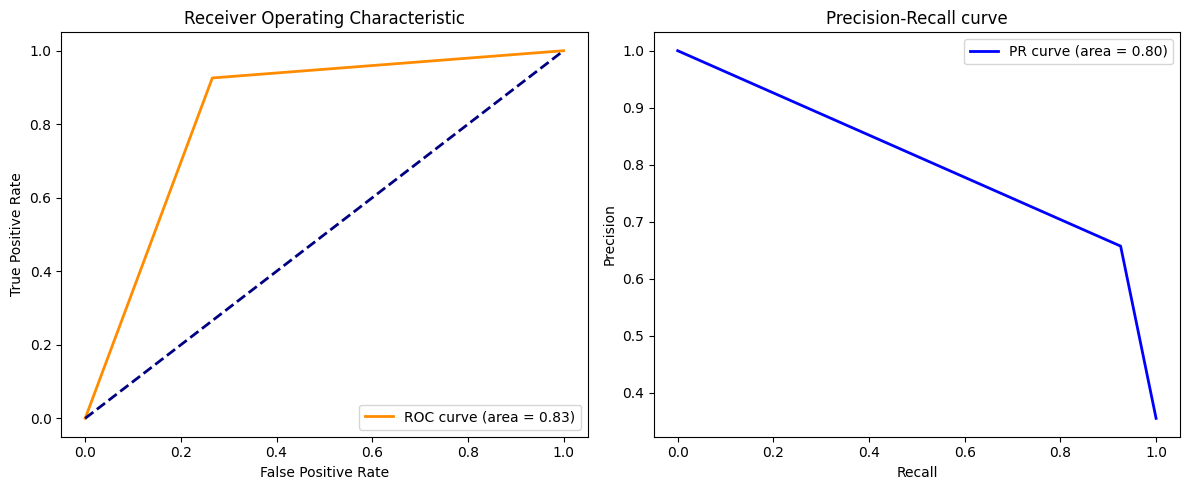

              precision    recall  f1-score   support

           0       0.95      0.73      0.83     28432
           1       0.66      0.93      0.77     15638

    accuracy                           0.80     44070
   macro avg       0.80      0.83      0.80     44070
weighted avg       0.84      0.80      0.81     44070

Total amount lost due to undetected fraud: € 43.16
Total amount lost due to undetected fraud: € 43.16


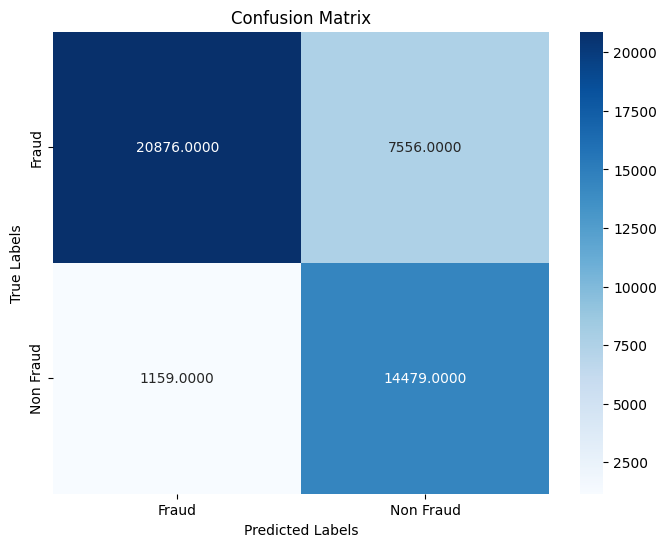

In [81]:
# List of trained models
models = [modelAutoencoder.eval(), modelSparseAuto.eval(), modelDenoisingAuto.eval(), modelVAEncoder.eval()]

# Evaluate the ensemble
evaluate_autoencoder_ensemble(models, X_test_df_scaled, y_test, 50)


In [ ]:


# Encode the Data
def encode_data(model, data):
    with torch.no_grad():
        encoded_data = modelSparseAuto.encoder(torch.tensor(data.values, dtype=torch.float32)).numpy()
    return encoded_data

X_test_encoded = encode_data(modelSparseAuto, X_test_df_scaled)

# Train a Surrogate Model
surrogate_model = LinearRegression()
surrogate_model.fit(X_test_encoded, y_test)

# Use k-means to summarize the background data
background_data_summary = shap.kmeans(X_test_encoded, 100)  # 100 samples to summarize the background

# Compute SHAP Values with summarized background data
explainer = shap.KernelExplainer(surrogate_model.predict, background_data_summary)
shap_values = explainer.shap_values(X_test_encoded)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_encoded)


  0%|          | 0/44070 [00:00<?, ?it/s]